# Importing Libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [33]:
picture_size = 48
folder_path = "images/"

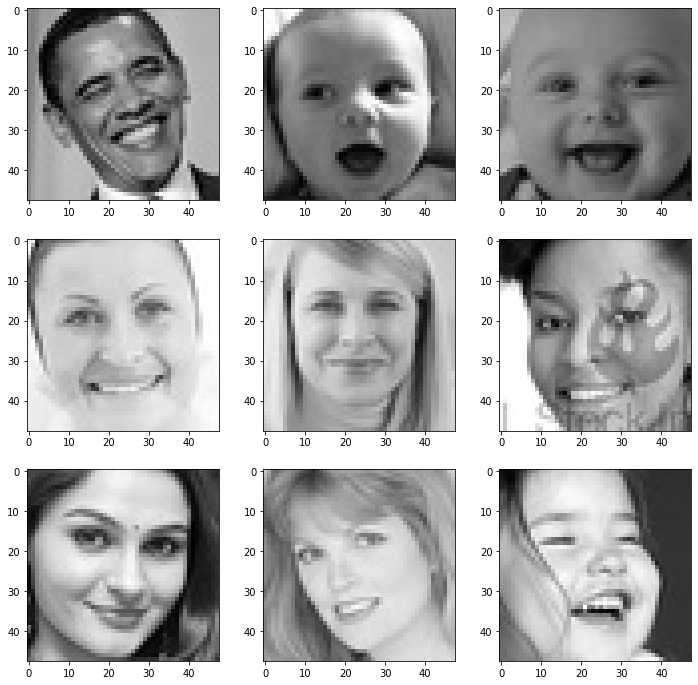

In [34]:
expression = 'happy'

plt.figure(figsize= (12,12)) 
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# MAKING TRAINING AND VALIDATION DATA

In [35]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 16095 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.


# MODEL HANDLING

In [36]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 2

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 128)      

# Fitting the Model with Training and Validation Data

In [37]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 4

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [38]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                             )

Epoch 1/4


C:\Users\aruna\AppData\Local\Temp\ipykernel_12308\2339963398.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


125/125 [==============================] - 235s 2s/step - loss: 0.6832 - accuracy: 0.6384 - val_loss: 0.9732 - val_accuracy: 0.4871 - lr: 0.0010
Epoch 2/4
125/125 [==============================] - 240s 2s/step - loss: 0.4770 - accuracy: 0.7762 - val_loss: 0.5127 - val_accuracy: 0.7534 - lr: 0.0010
Epoch 3/4
125/125 [==============================] - 249s 2s/step - loss: 0.3877 - accuracy: 0.8266 - val_loss: 0.6458 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 4/4
125/125 [==============================] - 257s 2s/step - loss: 0.3382 - accuracy: 0.8563 - val_loss: 0.3262 - val_accuracy: 0.8543 - lr: 0.0010


In [40]:
model.save('model.h5')

# Plotting Accuracy & Loss

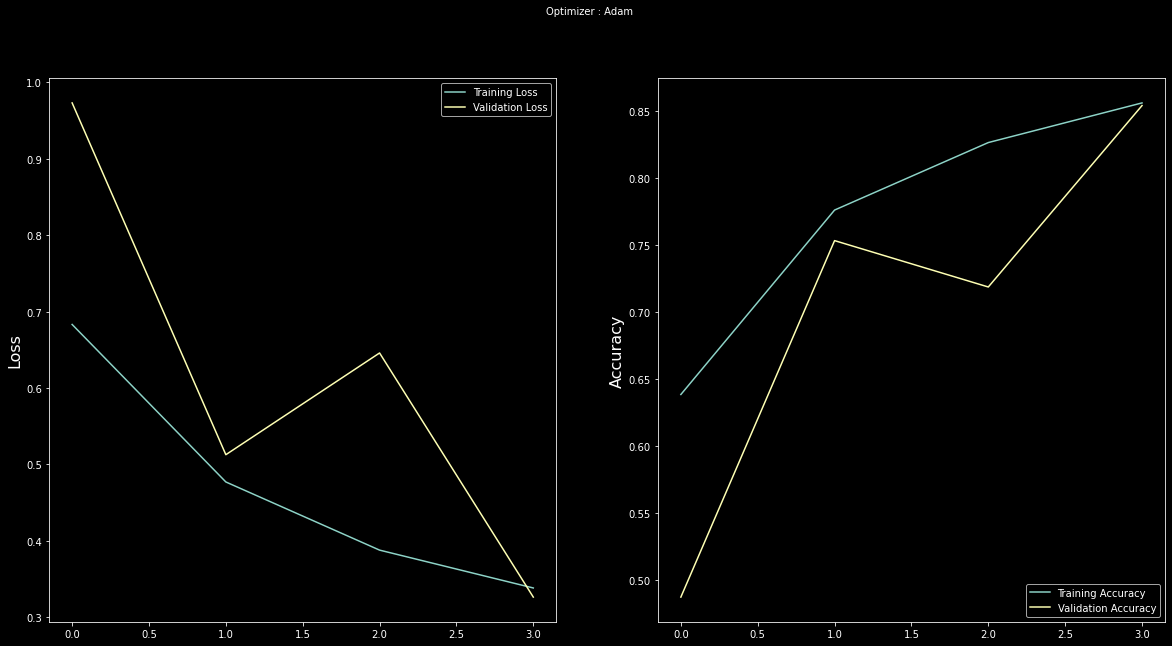

In [41]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [42]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classifier =load_model('model.h5')

emotion_labels = ['Happy', 'Sad']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            
            print(classifier.predict(roi))
            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[[0.25101167 0.74898833]]
[[0.2507862  0.74921376]]
[[0.2509859  0.74901414]]
[[0.2519942  0.74800587]]
[[0.2519756  0.74802446]]
[[0.25087237 0.7491276 ]]
[[0.25080463 0.7491954 ]]
[[0.25127205 0.748728  ]]
[[0.24963479 0.7503652 ]]
[[0.25205404 0.74794596]]
[[0.2507088 0.7492912]]
[[0.25091797 0.74908197]]
[[0.24934565 0.75065434]]
[[0.24949315 0.75050676]]
[[0.25121474 0.7487853 ]]
[[0.24908789 0.7509122 ]]
[[0.25012898 0.7498711 ]]
[[0.24923992 0.7507601 ]]
[[0.2498583 0.7501417]]
[[0.24893342 0.7510665 ]]
[[0.24917248 0.75082755]]
[[0.2512197 0.7487803]]
[[0.24926557 0.7507345 ]]
[[0.25014526 0.7498547 ]]
[[0.25135583 0.7486442 ]]
[[0.24929439 0.7507056 ]]
[[0.24924313 0.75075686]]
[[0.24898869 0.7510113 ]]
[[0.2517017 0.7482983]]
[[0.24876338 0.75123656]]
[[0.25248817 0.74751186]]
[[0.24891052 0.7510895 ]]
[[0.25175673 0.7482433 ]]
[[0.24929036 0.75070965]]
[[0.2516262 0.7483738]]
[[0.25028154 0.74971855]]
[[0.24941498 0.750585  ]]
[[0.25020006 0.74979997]]
[[0.25171837 0.7482816

[[0.25017357 0.74982643]]
[[0.2501699 0.7498301]]
[[0.25140736 0.7485927 ]]
[[0.24993637 0.7500636 ]]
[[0.25014234 0.74985766]]
[[0.2500314 0.7499686]]
[[0.24990654 0.75009346]]
[[0.25272235 0.7472777 ]]
[[0.24991196 0.75008804]]
[[0.25021365 0.7497863 ]]
[[0.25003746 0.74996257]]
[[0.25004536 0.74995464]]
[[0.25044104 0.7495589 ]]
[[0.25003415 0.74996585]]
[[0.24974003 0.75026   ]]
[[0.25005096 0.74994904]]
[[0.24988    0.75012004]]
[[0.25182214 0.7481779 ]]
[[0.24978654 0.7502135 ]]
[[0.24955589 0.75044405]]
[[0.24951264 0.7504873 ]]
[[0.24924822 0.75075173]]
[[0.25074667 0.7492534 ]]
[[0.24937338 0.7506266 ]]
[[0.24953511 0.7504649 ]]
[[0.24958678 0.7504132 ]]
[[0.24942613 0.7505739 ]]
[[0.24943012 0.75056994]]
[[0.24954353 0.7504565 ]]
[[0.24928012 0.75071985]]
[[0.24930814 0.7506919 ]]
[[0.25147402 0.748526  ]]
[[0.24937709 0.7506229 ]]
[[0.24934389 0.75065607]]
[[0.2493462 0.7506538]]
[[0.24943927 0.75056076]]
[[0.24924986 0.7507501 ]]
[[0.24932109 0.7506789 ]]
[[0.24932724 0.750

[[0.2495189 0.7504811]]
[[0.24969617 0.75030386]]
[[0.2510241 0.7489759]]
[[0.25158942 0.7484106 ]]
[[0.25036046 0.7496395 ]]
[[0.24974205 0.75025797]]
[[0.2516047 0.7483952]]
[[0.25063676 0.74936324]]
[[0.24948065 0.75051934]]
[[0.25128785 0.7487121 ]]
[[0.25049457 0.74950546]]
[[0.25150374 0.7484962 ]]
[[0.24949746 0.7505026 ]]
[[0.24824433 0.75175565]]
[[0.25106964 0.7489304 ]]
[[0.25185567 0.7481443 ]]
[[0.25139496 0.7486051 ]]
[[0.25053874 0.7494613 ]]
[[0.25114807 0.74885195]]
[[0.2502344  0.74976563]]
[[0.25060144 0.7493986 ]]
[[0.25011832 0.7498817 ]]
[[0.25105736 0.7489427 ]]
[[0.25067872 0.74932134]]
[[0.2515112 0.7484888]]
[[0.2502415  0.74975854]]
[[0.25142187 0.7485781 ]]
[[0.25014922 0.7498508 ]]
[[0.25141013 0.7485899 ]]
[[0.25104994 0.74895006]]
[[0.25194177 0.7480582 ]]
[[0.25155818 0.7484418 ]]
[[0.25094476 0.7490552 ]]
[[0.25081724 0.7491828 ]]
[[0.25027162 0.74972844]]
[[0.25146884 0.7485312 ]]
[[0.25031477 0.7496853 ]]
[[0.25094646 0.7490535 ]]
[[0.250962 0.749038]

[[0.24946503 0.750535  ]]
[[0.25061455 0.7493855 ]]
[[0.24933895 0.7506611 ]]
[[0.2506909  0.74930906]]
[[0.25138652 0.7486135 ]]
[[0.24987607 0.750124  ]]
[[0.25135285 0.74864715]]
[[0.2498071 0.7501929]]
[[0.2507598 0.7492402]]
[[0.24965367 0.75034636]]
[[0.25115502 0.748845  ]]
[[0.24938843 0.75061154]]
[[0.25145704 0.74854296]]
[[0.25144467 0.74855536]]
[[0.24971019 0.75028986]]
[[0.25069728 0.74930274]]
[[0.25037405 0.7496259 ]]
[[0.25089315 0.7491069 ]]
[[0.25108257 0.74891746]]
[[0.25142142 0.74857855]]
[[0.25001937 0.7499807 ]]
[[0.25082925 0.7491708 ]]
[[0.24983044 0.7501696 ]]
[[0.25085422 0.7491458 ]]
[[0.2502873  0.74971277]]
[[0.25023738 0.7497626 ]]
[[0.2506667 0.7493333]]
[[0.25112295 0.748877  ]]
[[0.24988598 0.7501141 ]]
[[0.2505289  0.74947107]]
[[0.24974391 0.75025606]]
[[0.25061357 0.7493864 ]]
[[0.24998632 0.7500137 ]]
[[0.2507811 0.7492189]]
[[0.24966156 0.75033844]]
[[0.25070462 0.74929535]]
[[0.24985445 0.75014555]]
[[0.2508112  0.74918884]]
[[0.24990569 0.75009

[[0.24951056 0.7504895 ]]
[[0.25029534 0.7497047 ]]
[[0.2498429 0.7501571]]
[[0.2501869 0.7498131]]
[[0.25099626 0.7490037 ]]
[[0.24948014 0.7505199 ]]
[[0.25050434 0.74949557]]
[[0.2503486 0.7496514]]
[[0.2510166 0.7489834]]
[[0.24965289 0.75034714]]
[[0.25066093 0.74933904]]
[[0.25071755 0.7492824 ]]
[[0.24999945 0.7500006 ]]
[[0.25101253 0.7489875 ]]
[[0.25119394 0.74880606]]
[[0.24954663 0.75045335]]
[[0.25057662 0.7494234 ]]
[[0.2508129 0.7491872]]
[[0.25137585 0.74862415]]
[[0.24927972 0.75072026]]
[[0.2502708  0.74972916]]
[[0.251325   0.74867505]]
[[0.24961765 0.7503823 ]]
[[0.25026357 0.7497364 ]]
[[0.24945132 0.75054866]]
[[0.2515075 0.7484925]]
[[0.2493863 0.7506137]]
[[0.25022492 0.74977505]]
[[0.25180948 0.7481906 ]]
[[0.24967253 0.75032747]]
[[0.24907212 0.75092787]]
[[0.25136334 0.7486366 ]]
[[0.24907294 0.7509271 ]]
[[0.2497336  0.75026643]]
[[0.24960689 0.75039303]]
[[0.24944656 0.7505534 ]]
[[0.25098777 0.74901223]]
[[0.24913874 0.7508612 ]]
[[0.24935523 0.75064474]]


[[0.2492445 0.7507555]]
[[0.24923274 0.7507673 ]]
[[0.2492946  0.75070536]]
[[0.2491412 0.7508588]]
[[0.24925809 0.75074196]]
[[0.24930725 0.7506928 ]]
[[0.24931668 0.75068337]]
[[0.24933985 0.7506602 ]]
[[0.24928547 0.75071454]]
[[0.24928786 0.7507121 ]]
[[0.2495581 0.7504419]]
[[0.24939431 0.75060564]]
[[0.24943073 0.7505692 ]]
[[0.24930292 0.75069714]]
[[0.24932876 0.7506712 ]]
[[0.25188938 0.74811065]]
[[0.24948911 0.7505109 ]]
[[0.24945572 0.75054425]]
[[0.24950112 0.7504989 ]]
[[0.24922827 0.7507717 ]]
[[0.24950874 0.7504912 ]]
[[0.24926624 0.75073373]]
[[0.24928346 0.75071657]]
[[0.25083423 0.7491658 ]]
[[0.24924688 0.75075316]]
[[0.24940206 0.7505979 ]]
[[0.24940594 0.7505941 ]]
[[0.24932572 0.7506743 ]]
[[0.24978061 0.7502194 ]]
[[0.2495928  0.75040716]]
[[0.24956067 0.7504394 ]]
[[0.24969764 0.7503023 ]]
[[0.24964799 0.75035197]]
[[0.25134394 0.74865603]]
[[0.24968949 0.7503105 ]]
[[0.24952133 0.75047874]]
[[0.25159633 0.74840367]]
[[0.2511327  0.74886733]]
[[0.25012195 0.749

[[0.24969971 0.7503003 ]]
[[0.24977438 0.7502256 ]]
[[0.24974744 0.75025254]]
[[0.24970844 0.7502916 ]]
[[0.24946156 0.7505384 ]]
[[0.24945875 0.7505413 ]]
[[0.25100228 0.7489977 ]]
[[0.24964853 0.7503514 ]]
[[0.24963169 0.7503683 ]]
[[0.24940217 0.75059783]]
[[0.25245962 0.74754035]]
[[0.24970983 0.75029016]]
[[0.24968159 0.7503184 ]]
[[0.24957252 0.7504275 ]]
[[0.2500187  0.74998134]]
[[0.25244477 0.74755526]]
[[0.2496718  0.75032824]]
[[0.24962066 0.7503794 ]]
[[0.24969323 0.7503067 ]]
[[0.252985 0.747015]]
[[0.24959423 0.7504057 ]]
[[0.2493215 0.7506785]]
[[0.2493431 0.7506569]]
[[0.2493876  0.75061244]]
[[0.24966994 0.7503301 ]]
[[0.24968664 0.75031334]]
[[0.25295183 0.74704814]]
[[0.24985786 0.7501421 ]]
[[0.25238487 0.7476151 ]]
[[0.24951948 0.7504805 ]]
[[0.24976031 0.7502397 ]]
[[0.2520961  0.74790394]]
[[0.2495978 0.7504022]]
[[0.24984 0.75016]]
[[0.24988021 0.75011975]]
[[0.25006804 0.749932  ]]
[[0.2498499 0.7501501]]
[[0.25037196 0.749628  ]]
[[0.24982293 0.7501771 ]]
[[0.

[[0.25183842 0.7481616 ]]
[[0.25111207 0.7488879 ]]
[[0.2501904 0.7498097]]
[[0.25169656 0.7483034 ]]
[[0.25140452 0.7485955 ]]
[[0.25079682 0.7492032 ]]
[[0.25087297 0.7491271 ]]
[[0.25081664 0.7491834 ]]
[[0.25131238 0.74868757]]
[[0.25072005 0.74928   ]]
[[0.2522021  0.74779785]]
[[0.25092748 0.7490725 ]]
[[0.25034368 0.7496563 ]]
[[0.25057617 0.7494238 ]]
[[0.25130928 0.7486907 ]]
[[0.251336 0.748664]]
[[0.2527228 0.7472772]]
[[0.25134152 0.7486585 ]]
[[0.25079215 0.7492079 ]]
[[0.25247002 0.74753   ]]
[[0.2506178 0.7493822]]
[[0.25143027 0.7485697 ]]
[[0.2525343 0.7474656]]
[[0.25179163 0.74820834]]
[[0.25179163 0.74820834]]
[[0.25278187 0.7472181 ]]
[[0.2523579 0.7476421]]
[[0.2522559  0.74774414]]
[[0.2522559  0.74774414]]
[[0.25164032 0.7483596 ]]
[[0.2512082 0.7487919]]
[[0.25079855 0.7492015 ]]
[[0.25063023 0.7493698 ]]
[[0.25067776 0.74932224]]
[[0.250472 0.749528]]
[[0.25025502 0.7497449 ]]
[[0.25037795 0.74962205]]
[[0.25032547 0.74967456]]
[[0.249213 0.750787]]
[[0.251223

[[0.24994424 0.7500558 ]]
[[0.25021893 0.74978113]]
[[0.25126866 0.7487314 ]]
[[0.2499552  0.75004476]]
[[0.24968255 0.7503175 ]]
[[0.2503556 0.7496444]]
[[0.2505561 0.7494439]]
[[0.25109932 0.7489008 ]]
[[0.25095698 0.74904305]]
[[0.25057384 0.7494261 ]]
[[0.25041452 0.74958545]]
[[0.24998538 0.75001466]]
[[0.25049788 0.74950206]]
[[0.25071692 0.74928313]]
[[0.25079107 0.749209  ]]
[[0.2508912  0.74910873]]
[[0.25090978 0.74909025]]
[[0.25143445 0.74856555]]
[[0.2504707 0.7495293]]
[[0.25048485 0.7495152 ]]
[[0.25041592 0.74958414]]
[[0.25008115 0.7499189 ]]
[[0.25107408 0.74892586]]
[[0.2512026 0.7487974]]
[[0.25111818 0.74888176]]
[[0.2501777 0.7498223]]
[[0.25116593 0.7488341 ]]
[[0.25144997 0.74855006]]
[[0.25152576 0.7484743 ]]
[[0.25157464 0.74842536]]
[[0.25162128 0.74837875]]
[[0.25126365 0.7487363 ]]
[[0.25051004 0.74948996]]
[[0.2500292 0.7499708]]
[[0.25072497 0.749275  ]]
[[0.25122747 0.74877256]]
[[0.25113302 0.7488669 ]]
[[0.25067785 0.7493221 ]]
[[0.25124943 0.7487506 ]

[[0.25026625 0.7497338 ]]
[[0.2504147 0.7495853]]
[[0.2499249 0.7500751]]
[[0.2506301  0.74936986]]
[[0.2509545  0.74904543]]
[[0.25122672 0.74877334]]
[[0.2514439 0.748556 ]]
[[0.25145954 0.74854046]]
[[0.25149485 0.7485052 ]]
[[0.25141042 0.7485896 ]]
[[0.25094154 0.7490584 ]]
[[0.2509049 0.7490951]]
[[0.25123924 0.74876076]]
[[0.25137404 0.74862593]]
[[0.25158995 0.74841005]]
[[0.25173903 0.748261  ]]
[[0.25174484 0.7482552 ]]
[[0.25162163 0.74837834]]
[[0.25165606 0.74834394]]
[[0.25183147 0.74816847]]
[[0.25182334 0.7481767 ]]
[[0.25180435 0.74819565]]
[[0.25211203 0.7478879 ]]
[[0.25210506 0.74789494]]
[[0.2521838 0.7478162]]
[[0.2523728 0.7476272]]
[[0.25233626 0.74766374]]
[[0.25225574 0.74774426]]
[[0.25226948 0.74773055]]
[[0.25232255 0.74767745]]
[[0.2523454  0.74765456]]
[[0.2523893  0.74761075]]
[[0.25249058 0.7475095 ]]
[[0.25249335 0.7475067 ]]
[[0.25120503 0.748795  ]]
[[0.25256696 0.747433  ]]
[[0.25270134 0.74729866]]
[[0.25247893 0.74752104]]
[[0.2525137 0.7474863]]


KeyboardInterrupt: 